Respuesta a Pregunta 1 de la Tarea 1 - [Criptografía y Seguridad Computacional](https://github.com/UC-IIC3253/2022/blob/main/Tareas/Tarea%201/enunciado/main/main.pdf) 2022-1

Alumno: Diego Iruretagoyena

---

Dado un alfabeto $\sum = \{\sigma_{0},...,\sigma_{N−1}\}$ 

Definiremos el esquema criptográfico $RP^{\sum,l}$ (Repeated Pad sobre $\sigma$ con llaves de largo l), como **(Gen, Enc, Dec)** donde:



**(Gen, Enc, Dec)**


**Generador** 

• Gen es la distribución uniforme sobre $\sum^{l}$.


**Función Encriptación**

• Dado $m = \sigma_{m_{0}},...,\sigma_{m_{n-1}} \in \sum^{∗}$ 
y $k = \sigma_{k_{0}},...,\sigma_{k_{l-1}} \in \sum^{l}$, el texto cifrado $c = Enc(k,m)$ se define como $c = \sigma_{c_{0}}, ..., \sigma_{c_{n - 1}}$ donde $c_{i} =((m_{i} + k \text{(i mod l))} \text{ mod (N}$


**Función Decriptación**

• Dado $c = \sigma_{c_{0}}, ..., \sigma_{c_{n - 1}} \in \sum^{*}$ y $k = \sigma_{k_{0}},...,\sigma_{k_{l-1}} \in \sum^{l}$, el texto plano $m = Dec(k,c)$ se define $m = \sigma_{m_{0}},...,\sigma_{m_{n-1}}$ donde $(m_{i} =(c_{i} − k (i mod l)) mod N$

Conocemos una forma decriptar mensajes suficientemente largos encriptados con $RP^{Σ,l}$, suponiendo que los mensajes originales estaban escritos en inglés y l era un valor conocido. Para esto se utilizó la frecuencia de caracteres del inglés, además de una noción que definía intuitivamente cuánto dista un string de seguir dicha frecuencia. 

Ahora buscamos generalizar e intentar decriptar $RP^{\sum,l}$ suponiendo:

• El largo de la llave es desconocido.\
• El mensaje original está en un idioma arbitrario, para el cual la frecuencia es conocida. \
• La noción de cuánto dista un string de seguir una frecuencia de caracteres es arbitraria.


# Respuesta

Se presenta una función que recibe un texto cifrado, una frecuencia de caracteres, y una función que indica cuánto dista un string de seguir una frecuencia de caracteres, y retorna la llave que se utilizó para encriptar el texto cifrado.

Idea

Conocemos una forma para romper este esquema criptográfico cuando tenemos:

- mensajes originales estaban escritos en inglés
- l era un valor conocido.
- frecuencia de caracteres
- distancia de un string de seguir dicha frecuencia.

La idea consiste en lo siguiente. Podemos decifrar un mensaje si conocemos el largo de la llave l, definimos una noción de distancia y tenemos la frecuencia de aparición de las letras en el abecedario original al comparar la distancia de las frecuencias de las todas las letras que encriptó cierta letra de la llave. De esta forma, vamos comparando distribuciones y asumiendo que la letra más repetida corresponderá a la más repetida en la distribución original.

Estamos midiendo qué tan buena es una llave en base a la distribución del texto a decriptar. 

Para mantener consistencia entre los nombres de las funciones pedidas en código y los comentarios de interpretabilidad, los comentarios de código y procedimiento se harán en ingles.

# Polyalphabetic Substitution Ciphers, The Vigenére Cipher (poly-alphabetic shift)  and how to exploit it through index of coincidence or local random search.

In [138]:
EN_REL_FREQ = {'A': 0.08167, 'B': 0.01492, 'C': 0.02782, 'D': 0.04253, 'E': 0.12702, 'F': 0.02228, 'G': 0.02015,
               'H': 0.06094, 'I': 0.06966, 'J': 0.00153, 'K': 0.00772, 'L': 0.04025, 'M': 0.02406, 'N': 0.06749,
               'O': 0.07507, 'P': 0.01929, 'Q': 0.00095, 'R': 0.05987, 'S': 0.06327, 'T': 0.09056, 'U': 0.02758,
               'V': 0.00978, 'W': 0.02360, 'X': 0.00150, 'Y': 0.01974, 'Z': 0.00074}


ENGLISH_FREQS = EN_REL_FREQ
SORTED_LETTERS = list(ENGLISH_FREQS.keys())
SIZE_LETTERS = len(EN_REL_FREQ)
EN_IC = 0.67

def encrypt(message, key):
    message = [SORTED_LETTERS.index(i) for i in message]
    key = [SORTED_LETTERS.index(i) for i in key]
    
    enc_message = [] 
    for i in range(len(message)):
        enc_val = message[i] + key[i % len(key)]
        enc_message.append(enc_val % SIZE_LETTERS)
        
        
    enc_message = "".join([SORTED_LETTERS[i] for i in enc_message])
    return enc_message



def decrypt(ciphertext, key):
    return "".join(SORTED_LETTERS[(SORTED_LETTERS.index(ciphertext[i]) - SORTED_LETTERS.index(key[i % len(key)])) % len(SORTED_LETTERS)] for i in range(len(ciphertext) + 1))


def abs_distance(string, frequencies):
    """
    Input
        string: An arbritrary string
        frequencies: A dictionary representing a character frequency
    
    Output
        distance: How distant is the string from the character frequency
    """
    return sum([abs(frequencies[c] - string.count(c) / len(string)) for c in frequencies])

Let's denote a private-key encryption scheme (Gen,Enc,Dec) over the messages space M and the keyspace K.

Gen, the key generation algorithm, is a randomized algorithm that returns a key k such that $k \in K$. We denote by $k \leftarrow Gen$ the process of generating a key k. In this example, Gen is uniformely distributed.

Enc (called the encryption algorithm) is an (potentially randomized) algorithm that on input a key $k \in K$ and a message $m \in M$, outputs a ciphertext c. We denote by $c \leftarrow Enck(m)$ the output of Enc on input key k and message m. In this example, ciphertext $c = Enc(k,m)$ will be defined as $c = \sigma_{c_{0}}, ..., \sigma_{c_{n - 1}}$ with $c_{i} =((m_{i} + k \text{(i mod l))} \text{ mod (N)}$
 

Dec (called the decryption algorithm) is a deterministic algorithm that on input a key k and a ciphertext c and outputs a message m. In this example, plain text $m = Dec(k,c)$ will be denoted by $m = \sigma_{m_{0}},...,\sigma_{m_{n-1}}$ with $(m_{i} =(c_{i} − k \text{(i mod l))} \text{ mod (N)}$


$\forall m \in M$, Pr[$k \leftarrow Gen: Dec_{k} (Enc_{k}(m)) = m$] = 1

(M, K, Gen, Enc, Dec) is a private-key encryption scheme if (Gen, Enc, Dec) is a private-key encryption scheme over the messages space M and the keyspace K.

## Encription procedure and alphabet frequency dictionary exploit

We know how the messages will be encrypted, as the encryption function is public. The ciphered message will be in the form of

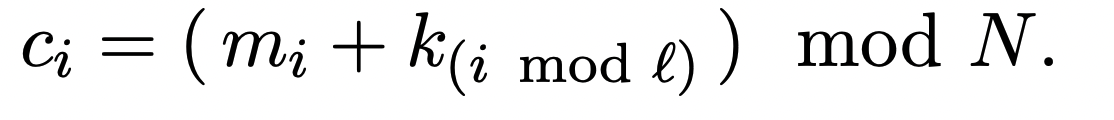

In [139]:
from IPython.display import Image, display

display(Image(filename = 'images/Enc.png', embed=True))

Resulting in something similar to doing this

In [140]:
plain_text_LS = "Its dangerous to go alone Hey Listen "
plain_text_no_spaces_LS = "".join(plain_text_LS.split()).upper()
KEY_LS = "TS"

print(plain_text_no_spaces_LS)
print(KEY_LS*(len(plain_text_no_spaces_LS)//len(KEY_LS)))

ITSDANGEROUSTOGOALONEHEYLISTEN
TSTSTSTSTSTSTSTSTSTSTSTSTSTSTS


Where we would be assigning a numerical value to each letter, according to its position in the alphabet, to then process a new value depending on the key value. i.e.:

In [141]:
print([SORTED_LETTERS.index(plain_text_idx) for plain_text_idx in plain_text_no_spaces_LS.upper()])
print([SORTED_LETTERS.index(i) for i in KEY_LS]* (len(plain_text_no_spaces_LS)//len(KEY_LS) ))

[8, 19, 18, 3, 0, 13, 6, 4, 17, 14, 20, 18, 19, 14, 6, 14, 0, 11, 14, 13, 4, 7, 4, 24, 11, 8, 18, 19, 4, 13]
[19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18, 19, 18]


Summing at each index and applying modulo. Then, we map it back according to its index and we have our ciphertext

In [142]:
original_values_LS =[SORTED_LETTERS.index(plain_text_idx) for plain_text_idx in plain_text_no_spaces_LS.upper()]
key_values_LS = [SORTED_LETTERS.index(i) for i in KEY_LS]* (len(plain_text_no_spaces_LS)//len(KEY_LS))

ciphertext_values_LS = [sum(x) for x in zip(original_values_LS, key_values_LS)]
print(ciphertext_values_LS)

[27, 37, 37, 21, 19, 31, 25, 22, 36, 32, 39, 36, 38, 32, 25, 32, 19, 29, 33, 31, 23, 25, 23, 42, 30, 26, 37, 37, 23, 31]


In [143]:
alphabet_size = len(SORTED_LETTERS)
ciphertext_values = [ i % alphabet_size for i in ciphertext_values_LS]
print(ciphertext_values)

[1, 11, 11, 21, 19, 5, 25, 22, 10, 6, 13, 10, 12, 6, 25, 6, 19, 3, 7, 5, 23, 25, 23, 16, 4, 0, 11, 11, 23, 5]


Mapping it back to letters

In [144]:
ciphered_letters_LS =  ''.join([SORTED_LETTERS[_idx] for _idx in ciphertext_values])
ciphered_letters_LS

'BLLVTFZWKGNKMGZGTDHFXZXQEALLXF'

In [145]:
ciphered_letters_LS == encrypt(plain_text_no_spaces_LS, KEY_LS)

True

Which is the same message we had received before.

Now, **to break the algorithm, we will abuse this fact in order to group all the letters we ciphered with each index of the original key, and compare the distribution of those groups to the frequencies of the original language (English)**. We know that each index of the key affected specific groups of letters in the original text.

We will group the letters of the ciphertext and compare the distribution of the groups against the original distribution. We will use a distance function to evaluate with result was the best, and respond the probable key based in that.

In [146]:
for i in range(len(KEY_LS)):
    chars = [j for j in ciphered_letters_LS[i::len(KEY_LS)]]
    print(chars)

['B', 'L', 'T', 'Z', 'K', 'N', 'M', 'Z', 'T', 'H', 'X', 'X', 'E', 'L', 'X']
['L', 'V', 'F', 'W', 'G', 'K', 'G', 'G', 'D', 'F', 'Z', 'Q', 'A', 'L', 'F']


In [147]:
for i in range(len(KEY_LS)):
    freqs = {}
    chars = [j for j in ciphered_letters_LS[i::len(KEY_LS)]]
    for item in chars:
        if item in freqs:
            freqs[item] += 1
        else:
            freqs[item] = 1
            
    print(freqs)
    print(chars, "\n")

{'B': 1, 'L': 2, 'T': 2, 'Z': 2, 'K': 1, 'N': 1, 'M': 1, 'H': 1, 'X': 3, 'E': 1}
['B', 'L', 'T', 'Z', 'K', 'N', 'M', 'Z', 'T', 'H', 'X', 'X', 'E', 'L', 'X'] 

{'L': 2, 'V': 1, 'F': 3, 'W': 1, 'G': 3, 'K': 1, 'D': 1, 'Z': 1, 'Q': 1, 'A': 1}
['L', 'V', 'F', 'W', 'G', 'K', 'G', 'G', 'D', 'F', 'Z', 'Q', 'A', 'L', 'F'] 



# The exploit will consist in comparing the frequencies in the aggregated groups versus the English alphabet frequencies.

This method is explained in the first chapter of Introduction to Modern Cryptography by Jonathan Katz and Yehuda Lindell.

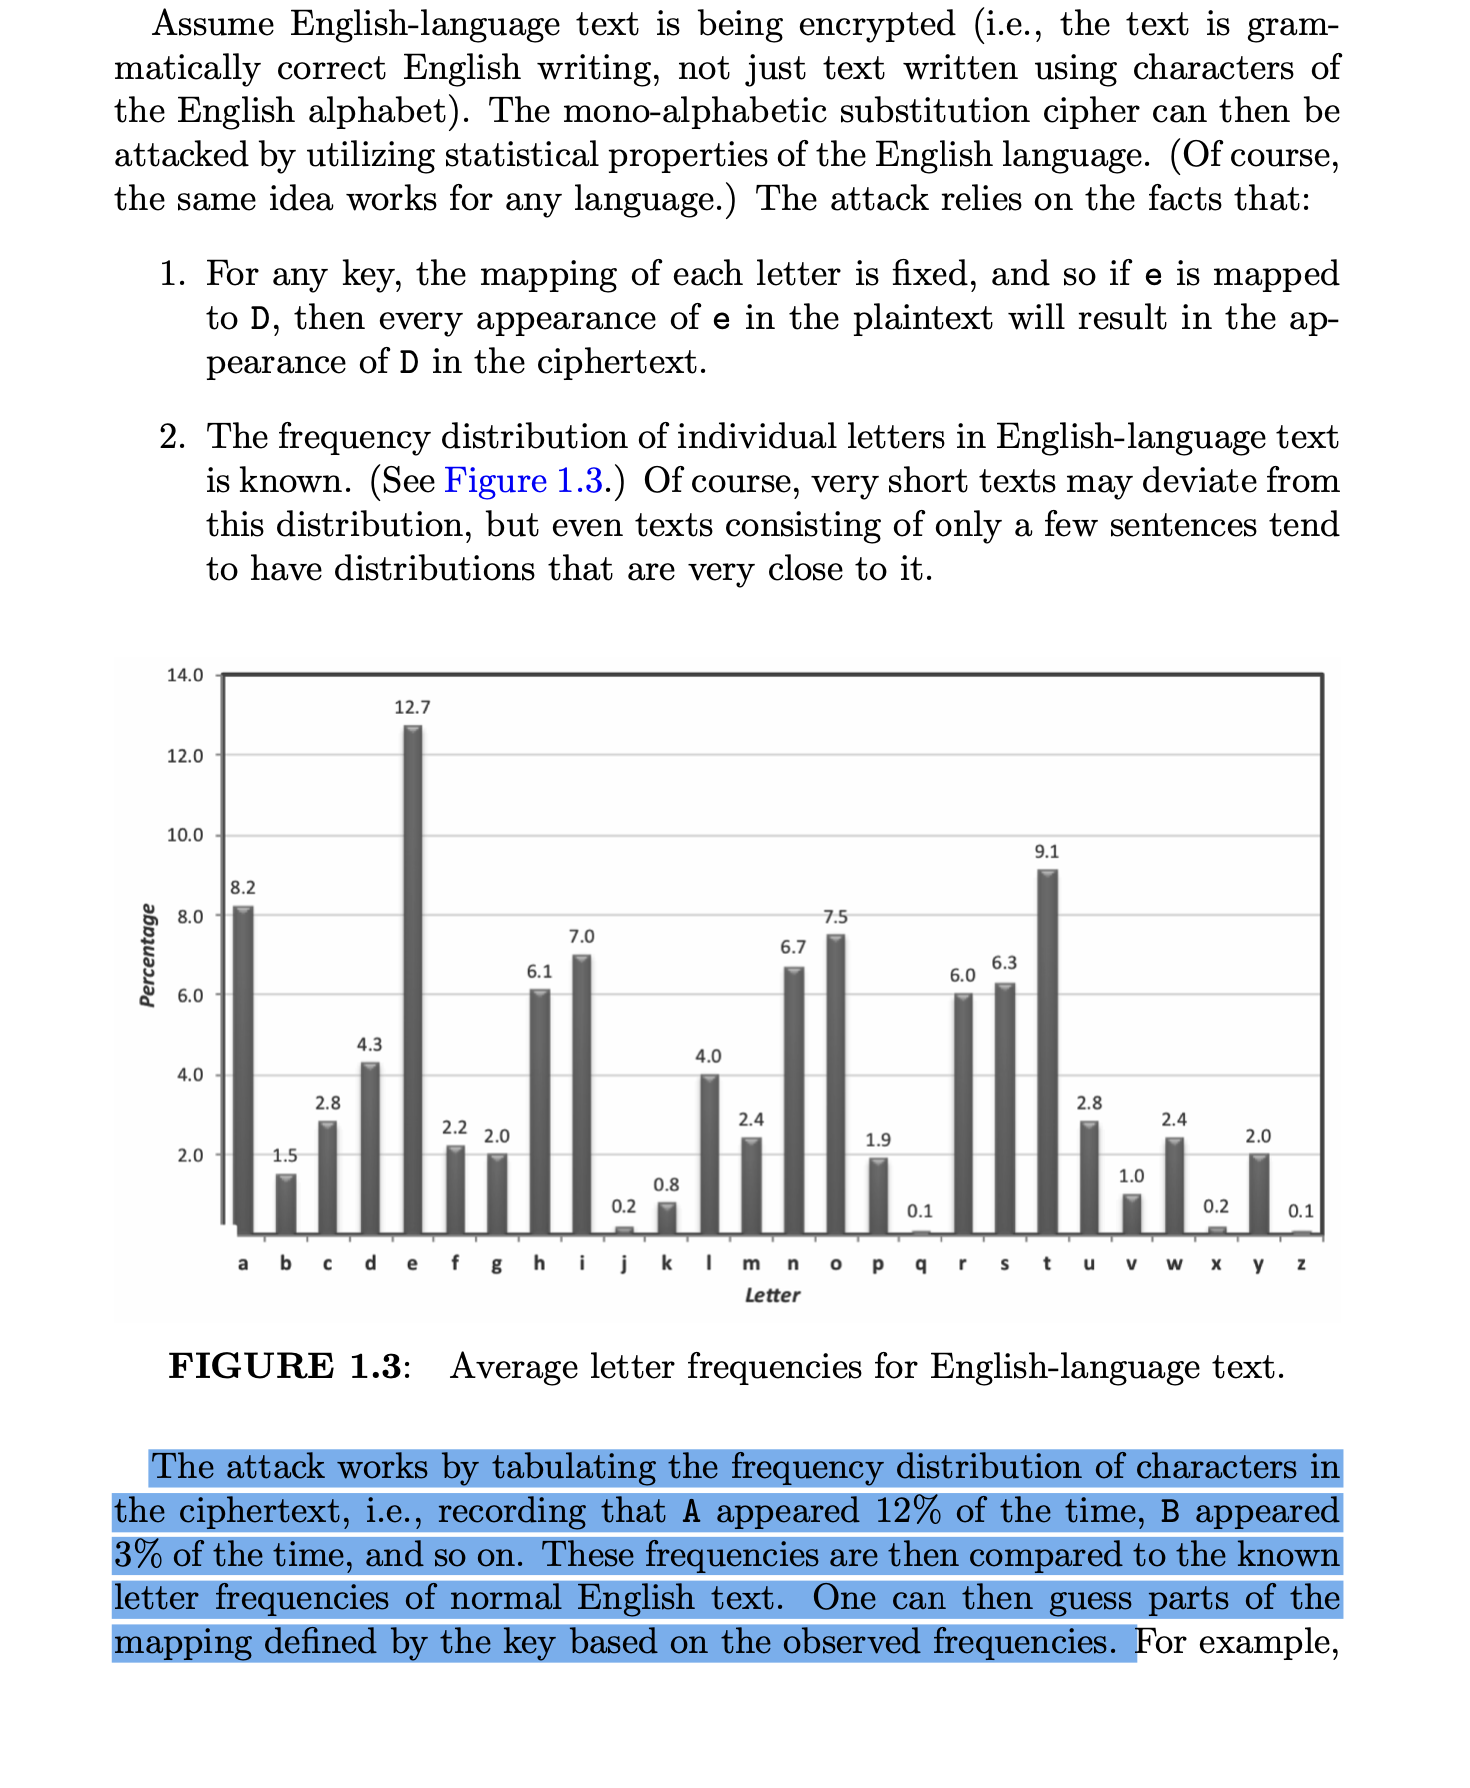

In [148]:
display(Image(filename = 'images/Freqs.png', embed=True))

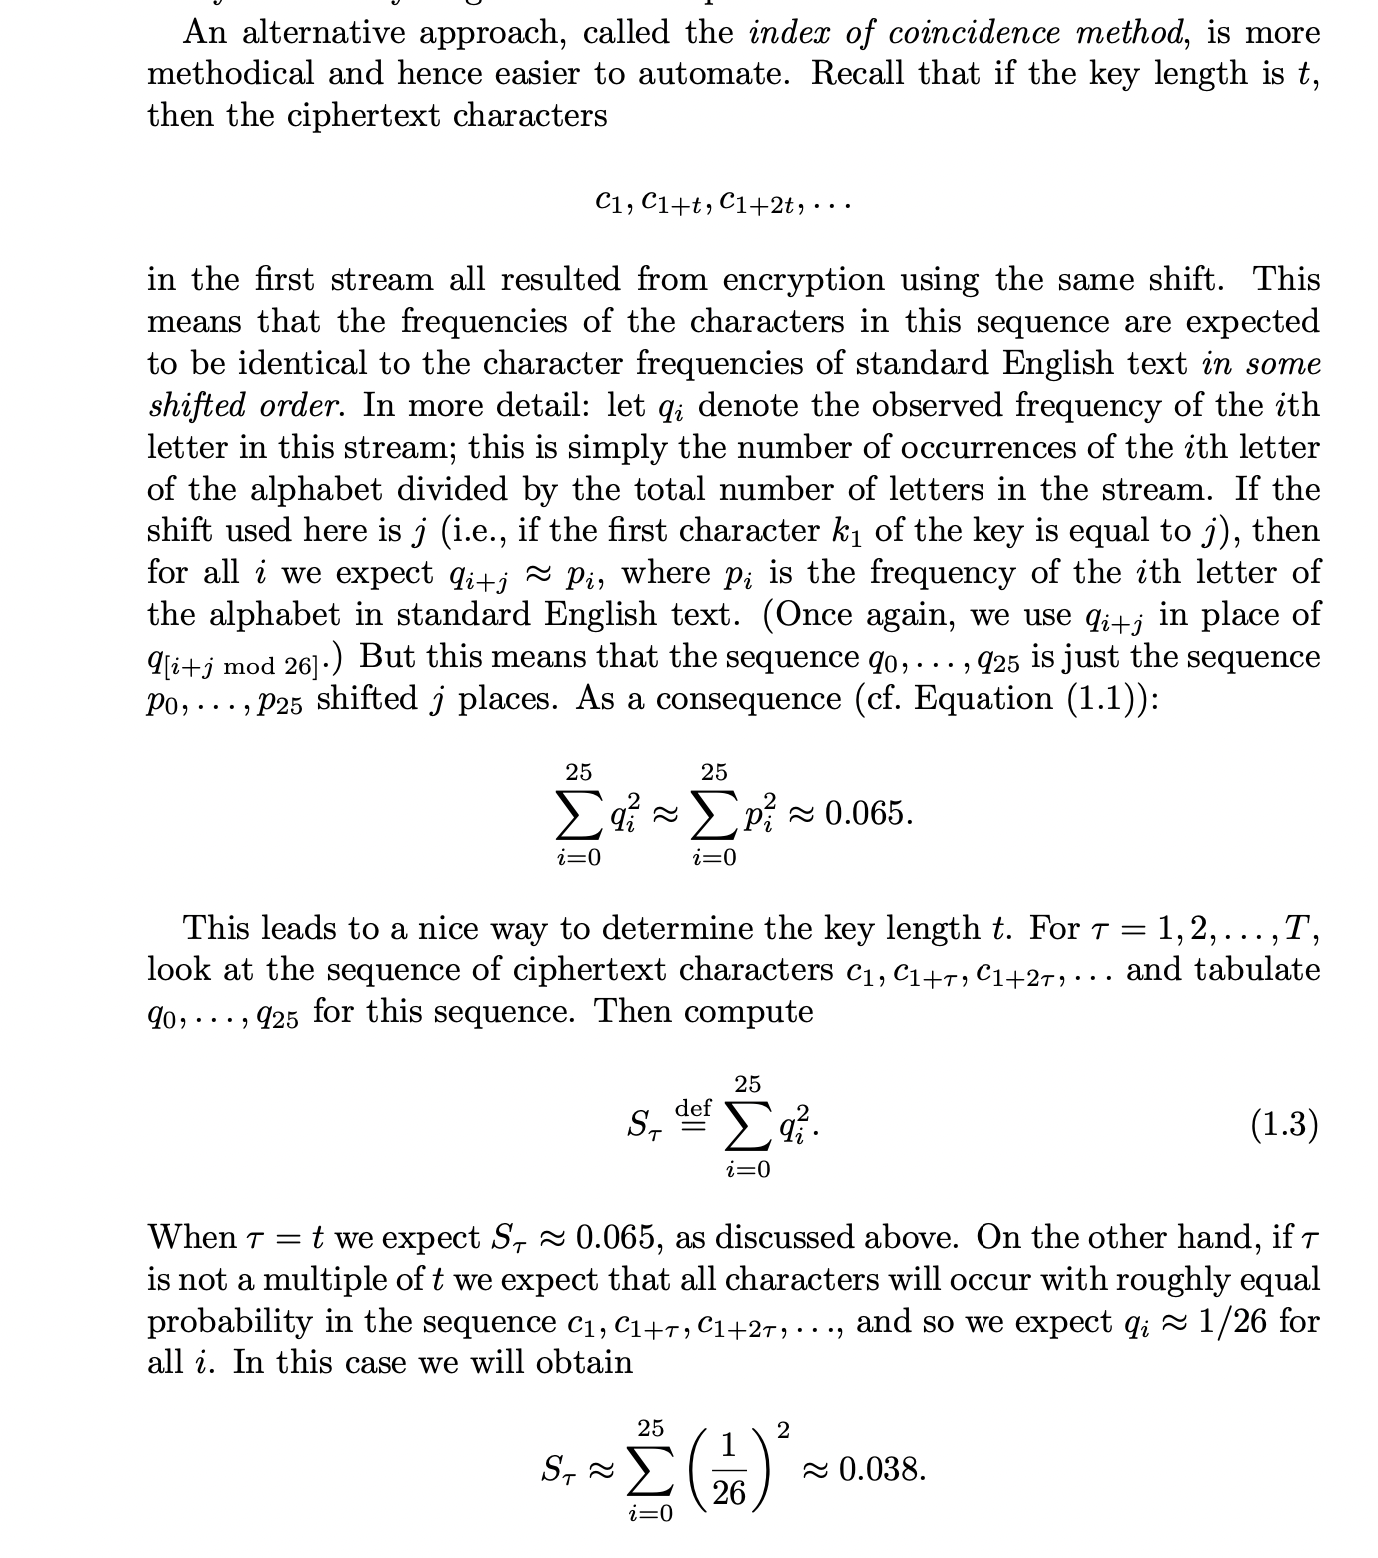

In [149]:
display(Image(filename='images/Intro1.png', embed=True))

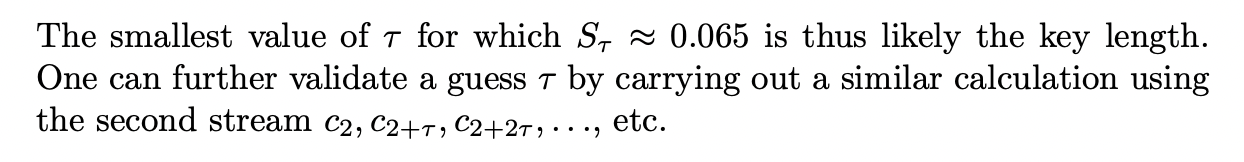

In [150]:
display(Image(filename='images/Intro2.png', embed=True))

# BREAK_RP for any length of key

We have a way to guess keys using frequencies when we know the length of the key. We extend this idea in order to guess keys of any length.

In [151]:
from sys import maxsize
import string

SEQ_LEN = 7
MAX_KEY_LEN = 8
EN_IC = 0.67
EN_REL_FREQ = {'A': 0.08167, 'B': 0.01492, 'C': 0.02782, 'D': 0.04253, 'E': 0.12702, 'F': 0.02228, 'G': 0.02015,
               'H': 0.06094, 'I': 0.06966, 'J': 0.00153, 'K': 0.00772, 'L': 0.04025, 'M': 0.02406, 'N': 0.06749,
               'O': 0.07507, 'P': 0.01929, 'Q': 0.00095, 'R': 0.05987, 'S': 0.06327, 'T': 0.09056, 'U': 0.02758,
               'V': 0.00978, 'W': 0.02360, 'X': 0.00150, 'Y': 0.01974, 'Z': 0.00074}


def get_columns(text_blocks):
    group_size = len(text_blocks[0])
    columns = []
    for letter_count in range(group_size):
        column = ''
        for group_count in range(len(text_blocks)):
            column += text_blocks[group_count][letter_count]
        columns.append(column)
    return columns


def to_blocks(cols):
    col_size = len(cols[0])
    blocks = []
    for letter in range(col_size):
        block = ''
        for col in range(len(cols)):
            block += cols[col][letter]
        blocks.append(block)
    return blocks


def get_letter_counts(text):
    text_upper = text.upper()
    letter_counts = {}
    for index, letter in enumerate(string.ascii_uppercase):
        letter_counts[letter] = text_upper.count(letter)
    return letter_counts


def _get_letter_frequencies(text):
    letter_counts = get_letter_counts(text)
    frequencies = {letter: count / len(text) for letter, count in letter_counts.items()}
    return frequencies


def shift(text, amount):
    shifted = ''
    letters = string.ascii_uppercase
    for letter in text:
        shifted += letters[(letters.index(letter) - amount) % len(letters)]
    return shifted


def _corr(text, lf):
    return sum([(lf[letter]*EN_REL_FREQ[letter]) for letter in text])


def _find_key_letter(text, lf):
    key_letter = ''
    min_distance = 10000
    
    for count, letter in enumerate(string.ascii_uppercase):
        shifted = shift(text=text, amount=count)
        
        distance = abs_distance(shifted, EN_REL_FREQ)
        
        if distance < min_distance:
            min_distance = distance
            key_letter = letter
            
    return key_letter

"""
def _find_key_letter(text, lf):
    key_letter = ''
    max_corr = 0
    for count, letter in enumerate(string.ascii_uppercase):
        shifted = shift(text=text, amount=count)
        corr = _corr(text=shifted, lf=lf)
        if corr > max_corr:
            max_corr = corr
            key_letter = letter
    return key_letter
"""

def restore_key(cyphertext, key_len):
    key = ''
    blocks = [cyphertext[i:i + key_len] for i in range(0, len(cyphertext) - key_len, key_len)]
    columns = get_columns(blocks)
    
    frequencies = _get_letter_frequencies(text=cyphertext)
    
    for column in columns:
        key += _find_key_letter(text=column, lf=frequencies)
        
    return key


def _ic(letter_counts):
    numerator = sum([letter_counts[l] * (letter_counts[l] - 1) for l in string.ascii_uppercase])
    text_size = sum(occurrences for occurrences in letter_counts.values())
    denominator = text_size*(text_size-1)
    
    return numerator / denominator


def find_key_length(cyphertext, max_key_len):
    min_diff = maxsize
    key_len = 0
    for candidate_length in range(1, max_key_len + 1):
        groups = [cyphertext[i:i+candidate_length] for i in range(0, len(cyphertext)-candidate_length, candidate_length)] 
        
        columns = get_columns(groups)
        
        ics = [_ic(letter_counts=get_letter_counts(text=column)) for column in columns]
        
        delta_bar_ic = sum(ics) / len(ics)
        
        total = EN_IC - delta_bar_ic
        
        if total < min_diff:
            min_diff = EN_IC - delta_bar_ic
            key_len = candidate_length
            
        print('L: ' + str(candidate_length) + '\n')
    return key_len


def _decypher(cyphertext, key):
    letters = string.ascii_uppercase
    shifts = [letters.index(letter) for letter in key]
    
    blocks = [cyphertext[i:i+len(key)] for i in range(0, len(cyphertext)-len(key), len(key))] 
    cols = get_columns(blocks)
    
    decyphered_blocks = to_blocks([shift(col, shift_) for col, shift_ in zip(cols, shifts)])
    decyphered = ''.join(decyphered_blocks)
    return decyphered


def break_rp(ciphertext, frequencies, abs_distance):
    """
    Input
        ciphertext:   An arbritrary string representing the encrypted version of a plaintext.
        frequencies: A dictionary representing a character frequency over the alphabet.
        distance: A function indicating how distant is a string from following a character frequency
        
    Output
        key: A guess of the key used to encrypt the ciphertext, assuming that the plaintext message 
             was written in a language in which letters distribute according to frequencies.
    """
    
    MIN_KEY_SIZE = 1
    MAX_KEY_SIZE = len(ciphertext) // 50
    
    print("MAX_KEY_SIZE ", MAX_KEY_SIZE)

    key_len = 0
    key_len = find_key_length(cyphertext=ciphertext, max_key_len=MAX_KEY_SIZE)
    key = restore_key(ciphertext, key_len)
    decyphered = _decypher(ciphertext, key)
    
    print("PROPOSED KEY", key)
    return key

    



## Test 1

In [152]:
ABC_plain_origin = "ALTHOUGHJANEISNOTPARTICULARLYIMPRESSEDWITHJORDANSWORKRANKINGHIMBELOWSOMEOFHEROTHERREPORTSSHEDOESNOTWANTCONFLICTSOSHEDECIDESTOGRANTJORDANWHATHEREQUESTSANDKEEPHIMHAPPYUNSURPRISINGLYJORDANSCOLLEAGUESREGARDHIMASMANIPULATIVEANDPUSHYBUTTHEYDECIDETONOTRAISETHEISSUEINTHEHOPETHATJANEAPPRECIATESTHEIRATTITUDEANDTHATTHEIRACHIEVEMENTSSPEAKFORTHEMSELVESSADLYTHEIRSTRATEGYISFARLESSEFFECTIVETHANJORDANSWHICHCAUSESMOREOFJANESREPORTSTOBULLYHERINTOAPROMOTIO"
ABC_KEY = "WED"
ABC_ciphertext = encrypt(ABC_plain_origin, ABC_KEY)

break_rp(ABC_ciphertext, EN_REL_FREQ, abs_distance)

MAX_KEY_SIZE  8
L: 1

L: 2

L: 3

L: 4

L: 5

L: 6

L: 7

L: 8

PROPOSED KEY WED


'WED'

## Test 2

In [153]:
plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = "".join(plain_text.split()).upper()*3
KEY = "LIOTI"
ciphertext = encrypt(plain_text_no_spaces, KEY)
break_rp(ciphertext, EN_REL_FREQ, abs_distance)

MAX_KEY_SIZE  5
L: 1

L: 2

L: 3

L: 4

L: 5

PROPOSED KEY LIOTI


'LIOTI'

# Test 3

In [154]:
plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = "".join(plain_text.split()).upper()*3
KEY = "DCDF"
ciphertext = encrypt(plain_text_no_spaces, KEY)
break_rp(ciphertext, EN_REL_FREQ, abs_distance)

MAX_KEY_SIZE  5
L: 1

L: 2

L: 3

L: 4

L: 5

PROPOSED KEY DCDF


'DCDF'

# Test 4

In [155]:
plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = "".join(plain_text.split()).upper()*3
KEY = "RTGSE"
ciphertext = encrypt(plain_text_no_spaces, KEY)
break_rp(ciphertext, EN_REL_FREQ, abs_distance)

MAX_KEY_SIZE  5
L: 1

L: 2

L: 3

L: 4

L: 5

PROPOSED KEY RTGSE


'RTGSE'

In [156]:
plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = "".join(plain_text.split()).upper()*3
KEY = "WERD"
ciphertext = encrypt(plain_text_no_spaces, KEY)
break_rp(ciphertext, EN_REL_FREQ, abs_distance)

MAX_KEY_SIZE  5
L: 1

L: 2

L: 3

L: 4

L: 5

PROPOSED KEY WERD


'WERD'

## Time Efficiency Constrain

Un texto cifrado con 1000 caracteres y un alfabeto de 30 caracteres, su función no puede demorar más de 10 segundos

In [157]:
import time

start_time = time.time()

plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = "".join(plain_text.split()).upper()*10
KEY = "LIO"
ciphertext = encrypt(plain_text_no_spaces, KEY)
break_rp(ciphertext, EN_REL_FREQ, abs_distance)

print(time.time() - start_time)


MAX_KEY_SIZE  18
L: 1

L: 2

L: 3

L: 4

L: 5

L: 6

L: 7

L: 8

L: 9

L: 10

L: 11

L: 12

L: 13

L: 14

L: 15

L: 16

L: 17

L: 18

PROPOSED KEY LIO
0.014310121536254883


In [158]:
# Stress tests
# For different key sizes, different messages, calculate key

def _test():
    pass


_test()

# We see that our algorithm correctly finds the key for all the tests given, despite not knowing the length of the key beforehand.

In [159]:
# Idea using abs_distance

def __break_rp(ciphertext, frequencies, abs_distance):
    """
    Input
        ciphertext: An arbritrary string representing the encrypted version of a plaintext.
        frequencies: A dictionary representing a character frequency over the alphabet.
        distance: A function indicating how distant is a string from following a character frequency
        
    Output
        key: A guess of the key used to encrypt the ciphertext, assuming that the plaintext message 
             was written in a language in which letters distribute according to frequencies.
    """
    
    MIN_KEY_SIZE = 1
    MAX_KEY_SIZE = len(ciphertext) // 50
    
    print("MAX_KEY_SIZE ", MAX_KEY_SIZE)
    
    def break_RP_known_key_length(ciphertext, frequencies, abs_distance, len_):
        # Index of coincidence
        # groups = [j for j in ciphered_letters_LS[i::len(KEY_LS)] for i in range(len_)]
        
        selected_key = ""
        
        for i in range(1, len_):
            candidate_char = ""
            lowest_distance = -100000
            
            # jth_streams
            groups = [j for j in ciphertext[i::len_] for i in range(1, len_)]
            
            # calc distance for each, save best
            for group in groups:
                group_string = "".join(group)
                curr_distance = abs_distance(group_string, ENGLISH_FREQS)

                if curr_distance < lowest_distance:
                    lowest_distance = curr_distance
                    candidate_char = _letter

            selected_key += candidate_char
                
        return selected_key
            
    
    best_key = ""
    best_distance = 99999
    
    # As the length "l" of key "k" is unknown, compute for each possible length
    for curr_key_length in range(MIN_KEY_SIZE, MAX_KEY_SIZE):
        
        potential_key = break_RP_known_key_length(ciphertext, frequencies, abs_distance, curr_key_length)
        print(potential_key)
        
        attempt_decypt = decrypt(ciphertext, potential_key)
        
        curr_distance = abs_distance(attempt_decypt, ENGLISH_FREQS)
        
        if curr_distance < best_distance:
            best_distance = curr_distance
            best_key = potential_key
    
    return best_key
